<a href="https://colab.research.google.com/github/kmongsil1105/colab_ipynb/blob/main/AI_%EC%98%81%EC%96%B4_Word2Vec_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fdac3662950>)

훈련 데이터 전처리하기

In [ ]:
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)
#print(content_text)
#########################################################
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)
#print(sent_text)
########################################################
# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [ ]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


Word2Vec 모델에 텍스트 데이터를 훈련

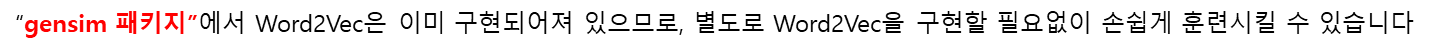

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)
# 만약 TypeError: __init__() got an unexpected keyword argument 'size' 라는 에러 발생 시에는
# size 대신 vector_size로 바꿔서 적어주세요.
print(model)  # ==> "임베딩벡터(밀집벡터)"로 변환된 자료

Word2Vec(vocab=21613, size=100, alpha=0.025)


Word2Vec의 하이퍼파라미터값은 다음과 같습니다. 
 * size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
 * window = 컨텍스트 윈도우 크기
 * min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
 * workers = 학습을 위한 프로세스 수
 * sg = 0은 CBOW, 1은 Skip-gram.

Word2Vec에 대해서 학습을 진행

 * Word2Vec는 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 model.wv.most_similar을 지원합니다. 
 
 man과 가장 유사한 단어들은 어떤 단어들일까요?

In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8412274122238159), ('guy', 0.819390058517456), ('lady', 0.7752916812896729), ('boy', 0.7685728073120117), ('girl', 0.7434206008911133), ('gentleman', 0.7330523729324341), ('soldier', 0.708797812461853), ('poet', 0.7023221254348755), ('kid', 0.6825586557388306), ('writer', 0.6633725166320801)]


이제 Word2Vec를 통해 단어의 유사도를 계산할 수 있게 되었습니다.

# Word2Vec 모델 저장하고 로드하기

공들여 학습한 모델을 언제든 나중에 다시 사용할 수 있도록 컴퓨터 파일로 저장하고 다시 로드해보겠습니다

In [ ]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

로드한 모델에 대해서 다시 man과 유사한 단어를 출력해보겠습니다

In [ ]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8412274122238159), ('guy', 0.819390058517456), ('lady', 0.7752916812896729), ('boy', 0.7685728073120117), ('girl', 0.7434206008911133), ('gentleman', 0.7330523729324341), ('soldier', 0.708797812461853), ('poet', 0.7023221254348755), ('kid', 0.6825586557388306), ('writer', 0.6633725166320801)]
